# Distribuições Amostrais com Dados do NHANES


Este código tem como objetivo demonstrar, de forma prática, os conceitos fundamentais de distribuições amostrais aplicados a dados reais do conjunto NHANES (National Health and Nutrition Examination Survey). A proposta é fazer a ponte entre a teoria estatística e a experimentação empírica por meio da simulação e análise computacional, mostrando como as propriedades das amostras se relacionam com a população da qual foram retiradas.


No contexto da estatística inferencial, toda análise que busca fazer inferências sobre uma população a partir de uma amostra depende de compreender o comportamento das estimativas amostrais, como médias, proporções ou desvios-padrão. Este notebook mostra, portanto, como essas estimativas variam de uma amostra para outra e como, à medida que o tamanho da amostra aumenta, suas distribuições se aproximam da distribuição normal, em conformidade com o Teorema Central do Limite.


Ao utilizar o dataset NHANES, que contém dados de saúde e características demográficas de milhares de indivíduos, o código fornece um cenário realista para simular diferentes tamanhos de amostras, calcular estatísticas descritivas e observar empiricamente a variabilidade amostral. A partir disso, o estudante visualiza na prática conceitos como:


A diferença entre população e amostra;


O papel da média amostral como estimador da média populacional;


O impacto do tamanho da amostra na precisão das estimativas;


A formação da distribuição amostral da média e sua convergência à normalidade.


Dessa forma, o notebook não apenas reforça o raciocínio teórico da inferência estatística, mas também introduz a importância da reprodutibilidade computacional no ensino de estatística. O uso de Python e bibliotecas como pandas, numpy e matplotlib permite visualizar as diferenças entre amostras, explorar as leis probabilísticas que regem o comportamento das médias e compreender como a incerteza é quantificada nas análises estatísticas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.distributions import norm

In [2]:
# Carregando dados NHANES (arquivo necessário localmente)
da = pd.read_csv("nhanes_2015_2016.csv")
da

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


## Distribuição amostral da média - Subamostras de tamanho 100

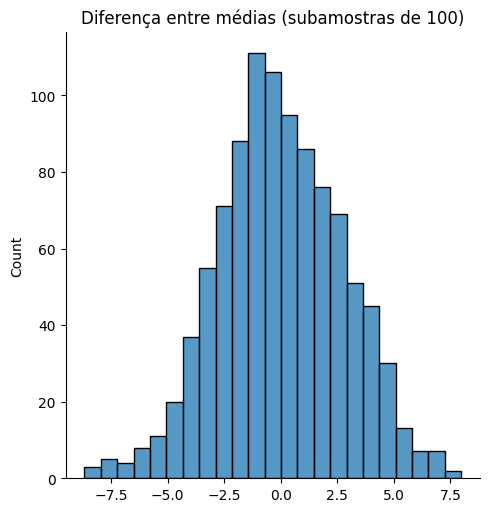

count    1000.000000
mean       -0.015580
std         2.767308
min        -8.680851
25%        -1.839668
50%        -0.122295
75%         1.858848
max         7.979167
dtype: float64

In [ ]:
m = 100 # tamanho da subamostra
sbp_diff = [] # lista para armazenar diferenças de médias

for i in range(1000): # número de iterações
    dx = da.sample(2 * m) # amostra aleatória de tamanho 2m
    dx1 = dx.iloc[0:m, :] # primeira subamostra
    dx2 = dx.iloc[m:, :] # segunda subamostra
    sbp_diff.append(dx1["BPXSY1"].mean() - dx2["BPXSY1"].mean()) # diferença entre médias

sns.displot(sbp_diff) # plot da distribuição das diferenças
plt.title("Diferença entre médias (subamostras de 100)") # título do gráfico
plt.show()

In [ ]:
pd.Series(da["BPXSY1"]).describe() # estatísticas descritivas da variável BPXSY1

count    5401.000000
mean      125.084614
std        18.480873
min        82.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       236.000000
Name: BPXSY1, dtype: float64

In [9]:
pd.Series(sbp_diff).describe() #checando as estatísticas do dado

count    1000.000000
mean       -0.015580
std         2.767308
min        -8.680851
25%        -1.839668
50%        -0.122295
75%         1.858848
max         7.979167
dtype: float64

## Distribuição amostral da média - Subamostras de tamanho 400

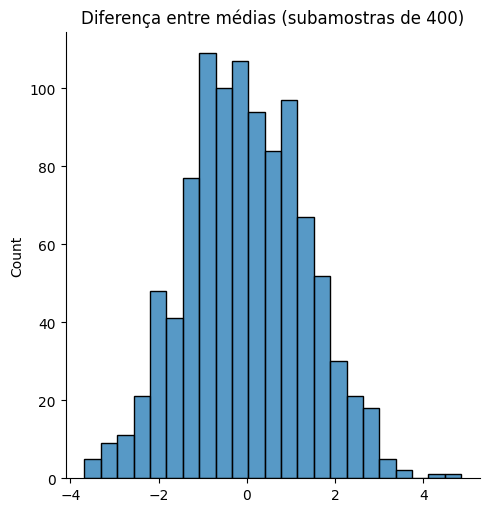

count    1000.000000
mean       -0.014780
std         1.337980
min        -3.677056
25%        -0.950541
50%        -0.063390
75%         0.937205
max         4.854591
dtype: float64

In [ ]:
m = 400 # novo tamanho da subamostra
sbp_diff = [] # reiniciando a lista para diferenças de médias

for i in range(1000): # número de iterações
    dx = da.sample(2 * m) # amostra aleatória de tamanho 2m
    dx1 = dx.iloc[0:m, :] # primeira subamostra
    dx2 = dx.iloc[m:, :] # segunda subamostra
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean()) # diferença entre médias

sns.displot(sbp_diff) # plot da distribuição das diferenças
plt.title("Diferença entre médias (subamostras de 400)") # título do gráfico
plt.show()

pd.Series(sbp_diff).describe() #checando as estatísticas do dado

## Distribuição amostral do coeficiente de correlação

In [ ]:
for m in [100, 400]: # diferentes tamanhos de subamostra

    sbp_diff = [] # lista para armazenar diferenças de correlações

    for i in range(1000): # número de iterações
        dx = da.sample(2 * m) # amostra aleatória de tamanho 2m
        dx1 = dx.iloc[0:m, :] # primeira subamostra
        dx2 = dx.iloc[m:, :] # segunda subamostra 
        r1 = dx1.loc[:, ["BPXSY1", "BPXDI1"]].corr().iloc[0,1] # correlação na primeira subamostra
        r2 = dx2.loc[:, ["BPXSY1", "BPXDI1"]].corr().iloc[0,1] # correlação na segunda subamostra
        sbp_diff.append(r1 - r2) # diferença entre correlações
    print(f"m={m}", "Desvio padrão empírico:", np.std(sbp_diff), "Aproximação teórica:", np.sqrt(2 / m)) # comparação do desvio padrão empírico com a aproximação teórica

## Forma da distribuição amostral da média (CLT)

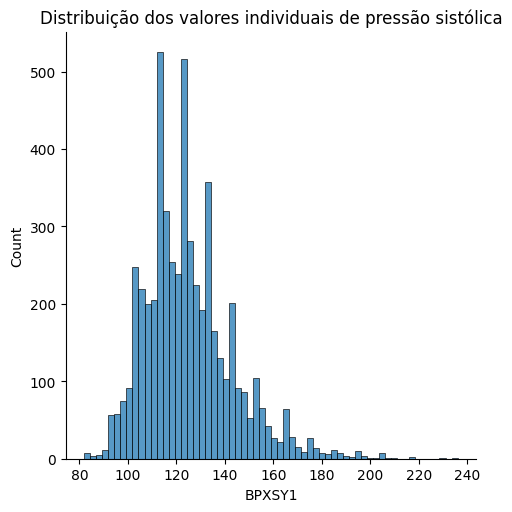

In [ ]:
sns.displot(da["BPXSY1"].dropna()) # plot da distribuição dos valores individuais
plt.title("Distribuição dos valores individuais de pressão sistólica") # título do gráfico
plt.show()

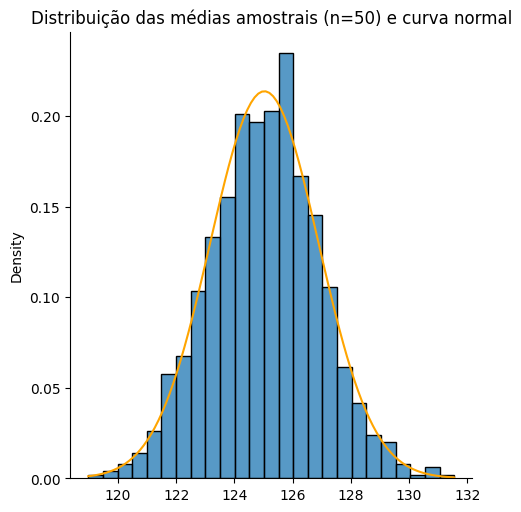

In [ ]:
m = 100 # tamanho da amostra
sbp_mean = [] # lista para armazenar médias amostrais

for i in range(1000): # número de iterações
    dx = da.sample(m) # amostra aleatória de tamanho m 
    sbp_mean.append(dx["BPXSY1"].dropna().mean()) # média amostral

sns.displot(sbp_mean, stat="density") # plot da distribuição das médias amostrais

x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100) # valores x para a curva normal
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean)) # valores y para a curva normal
plt.plot(x, y, color='orange') # plot da curva normal
plt.title("Distribuição das médias amostrais (n=50) e curva normal") # título do gráfico
plt.show()